# ECSE415 - Assignment 4
Julianna Tchebotareva
260761726

In [341]:
# import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

#scikit-learn import this too
from sklearn.neighbors import KNeighborsClassifier

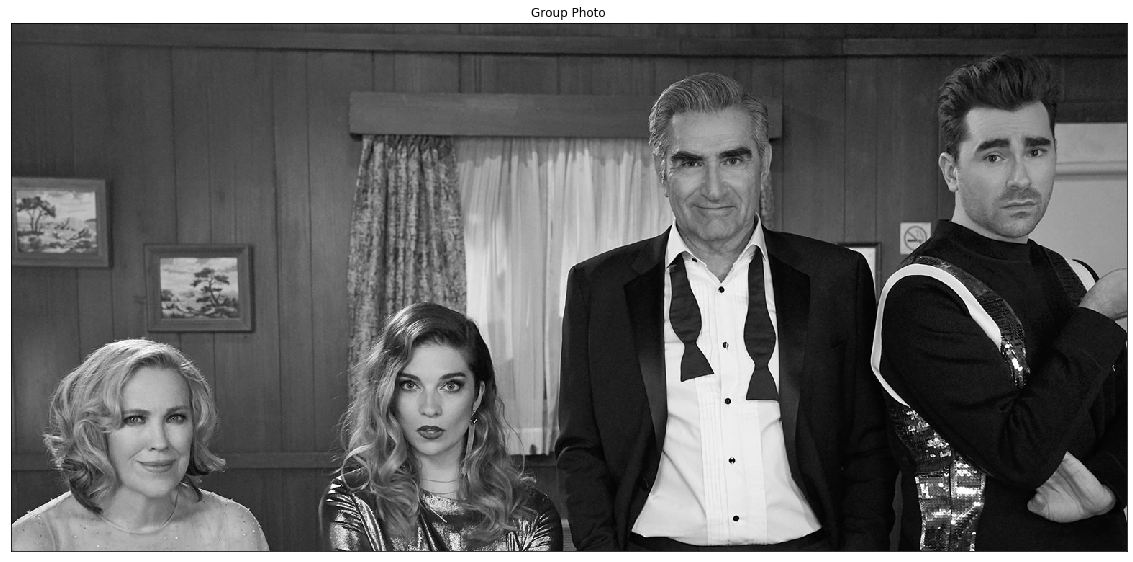

In [342]:
#group Photo

# load images

image_path = "./groupPhoto.png" # use your own image path
img = cv2.imread(image_path)

# convert from BGR to RGB. need to do this to use MatPlotLib
res1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# view image
plt.figure(figsize=(20,20))
plt.imshow(res1, cmap='gray'), plt.title("Group Photo")
plt.xticks([]), plt.yticks([])
plt.show()

Photos in Set 10


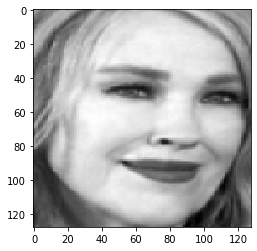

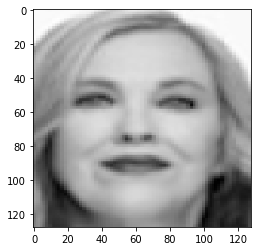

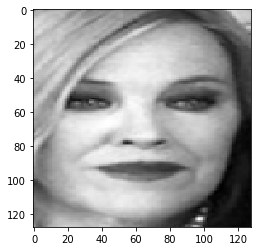

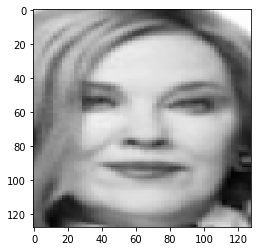

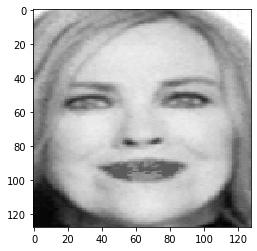

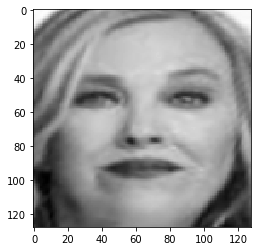

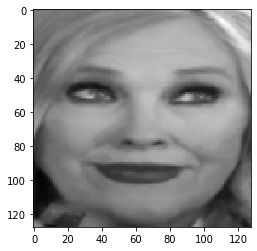

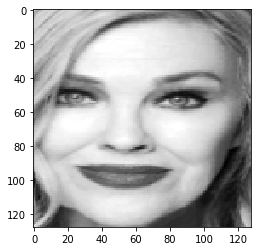

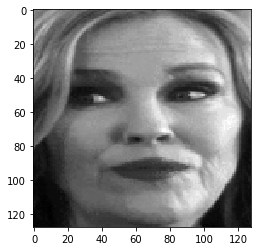

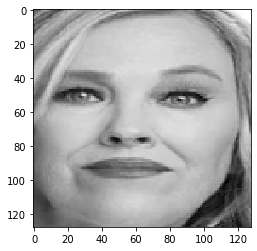

In [343]:
#make an array to hold all 40 face images
trainingImgs = []

# Moira Photos

moiraimgs = []
for num in range(1,11):
    moiraimgs.append("./Moira/M{number}.png".format(number=num))

print("Photos in Set", len(moiraimgs))
    
Moira = []
for i in moiraimgs:
    img = cv2.imread(i, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    pic = cv2.resize(img, (128, 128),interpolation=cv2.INTER_AREA)
    Moira.append(pic)
    trainingImgs.append(pic)
    plt.figure()
    plt.imshow(pic,cmap="gray")
    plt.show()

Photos in Set 10


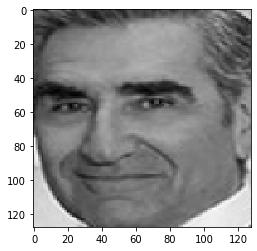

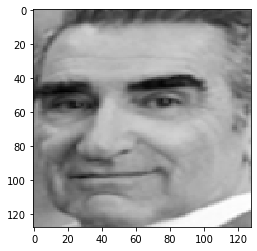

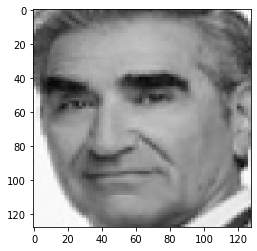

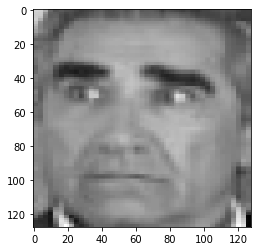

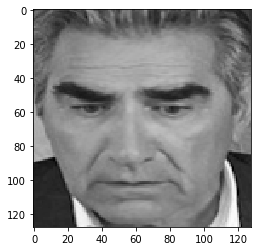

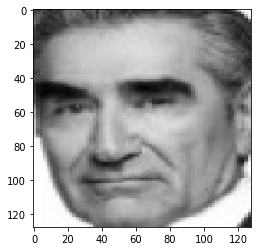

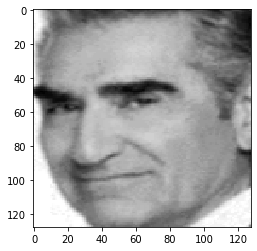

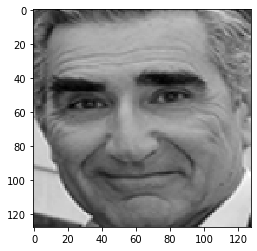

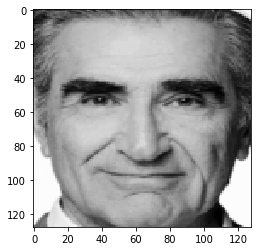

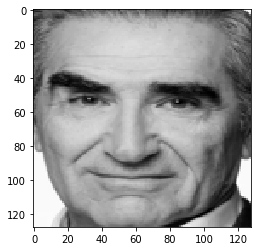

In [344]:
# Johnny Photos

johnnyimgs = []
for num in range(3,13):
    johnnyimgs.append("./Johnny/J{number}.png".format(number=num))

print("Photos in Set", len(johnnyimgs))
    
Johnny = []
for i in johnnyimgs:
    img = cv2.imread(i, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    pic = cv2.resize(img, (128, 128),interpolation=cv2.INTER_AREA)
    Johnny.append(pic)
    trainingImgs.append(pic)
    plt.figure()
    plt.imshow(pic,cmap="gray")
    plt.show()

Photos in Set 10


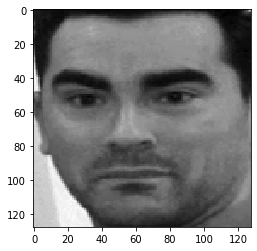

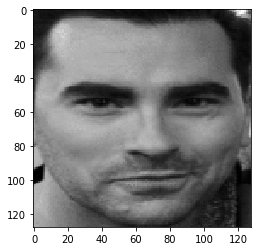

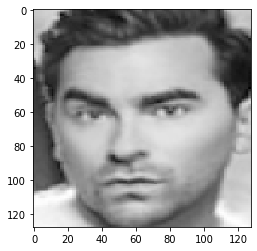

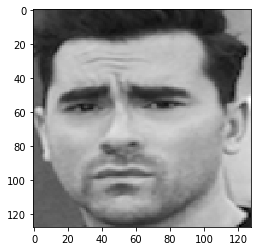

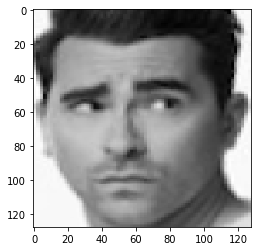

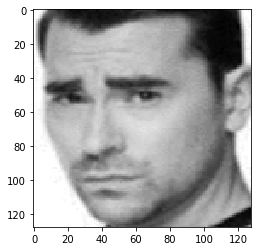

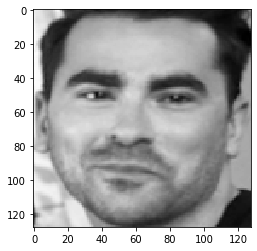

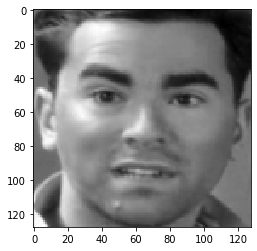

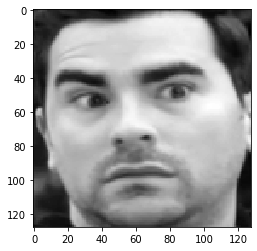

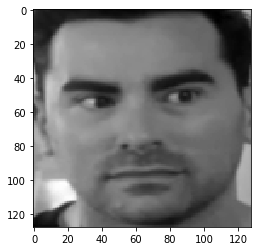

In [345]:
# David Photos

davidimgs = []
for num in range(1,11):
    davidimgs.append("./David/D{number}.png".format(number=num))

print("Photos in Set", len(davidimgs))
    
David = []
for i in davidimgs:
    img = cv2.imread(i, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    pic = cv2.resize(img, (128, 128),interpolation=cv2.INTER_AREA)
    David.append(pic)
    trainingImgs.append(pic)
    plt.figure()
    plt.imshow(pic,cmap="gray")
    plt.show()

Photos in Set 10


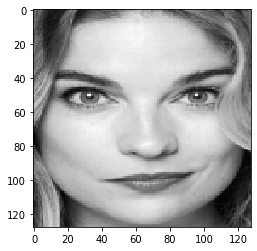

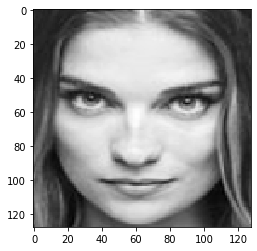

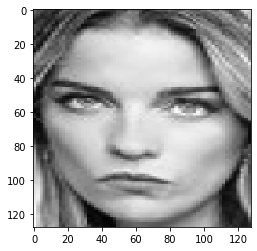

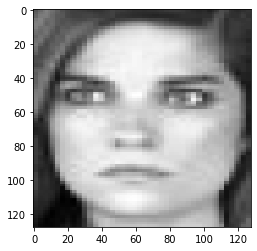

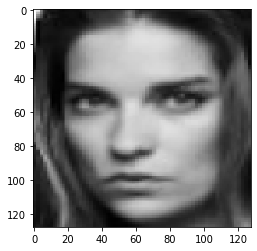

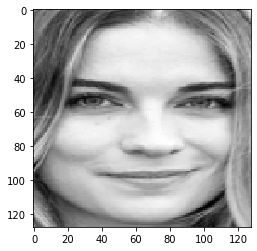

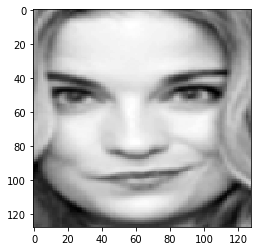

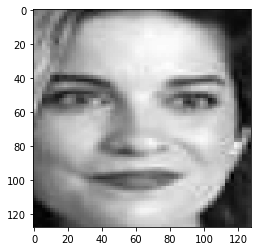

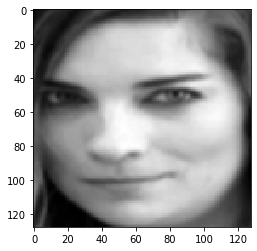

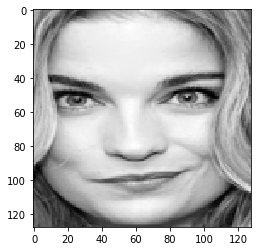

In [346]:
# Alexis Photos

alexisimgs = []
for num in range(3,13):
    alexisimgs.append("./Alexis/A{number}.png".format(number=num))

print("Photos in Set", len(alexisimgs))
    
Alexis = []
for i in alexisimgs:
    img = cv2.imread(i, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    pic = cv2.resize(img, (128, 128),interpolation=cv2.INTER_AREA)
    Alexis.append(pic)
    trainingImgs.append(pic)
    plt.figure()
    plt.imshow(pic,cmap="gray")
    plt.show()

## 1. Data Acquisition
#### Describe how you selected the images with respect to the conditions of the detection/recognition methods. (3 points)

I selected 10 images for each individual by searching for photos that showed a full on angle of the face, were lacking a expression and were of similar quality.

I attempted to find photos of similar lighting conditions as well as skin smoothness. 

All the collected images were cropped to contain only the face, converted to grayscale and resized to 128x128 (to avoid computation issues and reduce dimentionality of the data). The grayscale eliminated the colour channel which would cause more inconsitensies with brightness and lightning.

#### Show at least 5 example images for each individual (5 points)

In [347]:
#function to plot 5 images at a time
def plot(segImgs):    
    plt.figure(figsize=(20,20))
    for i in range(5):
        plt.subplot(151 + i)
        plt.imshow(segImgs[i], cmap="gray")
        plt.title("Picture " + str(i+1)), plt.xticks([]), plt.yticks([])
    plt.show()

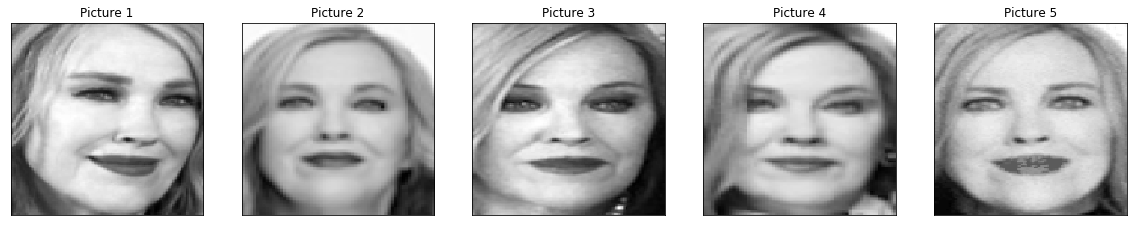

In [348]:
plot(Moira)

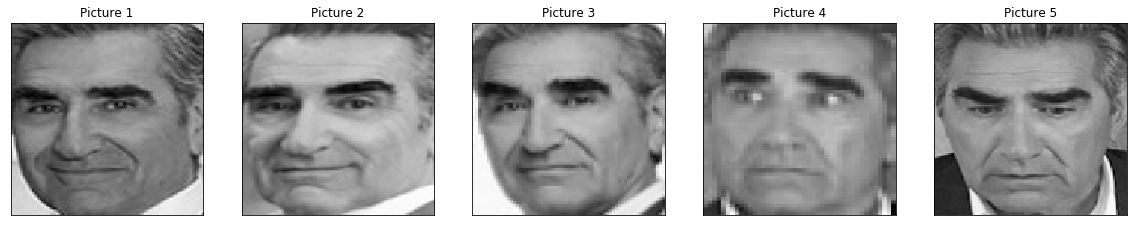

In [349]:
plot(Johnny)

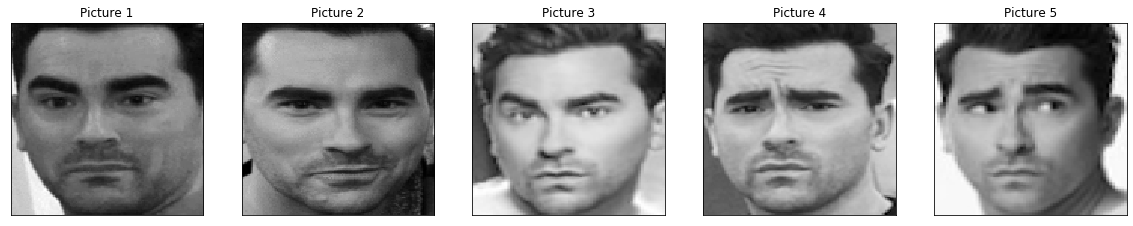

In [350]:
plot(David)

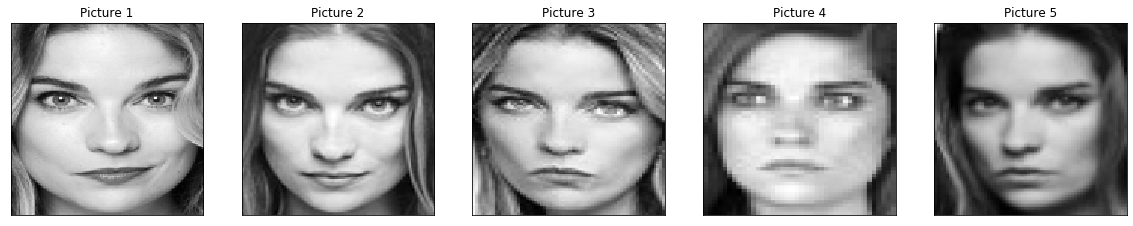

In [351]:
plot(Alexis)

In [352]:
print(len(trainingImgs))

40


#### Please see img_references.rtf for references of the photographs.

##  2.  Eigenface Representation
#### You should implement Snapshot method for PCA (cov- ered in class - Lecture 17) from scratch using numpy. (15 points)

40
(128, 128)


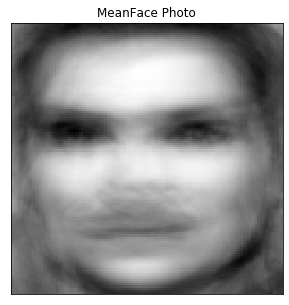

In [353]:
#find mean face
print(len(trainingImgs))

meanface = []

newimg = np.zeros((128,128))
print(newimg.shape)
for img in trainingImgs:
    newimg = np.add(img, newimg)
    
#print(newimg)
meanface =  newimg * (1/len(trainingImgs))
#print(meanface)

# view image
plt.figure(figsize=(5,5))
plt.imshow(meanface, cmap='gray'), plt.title("MeanFace Photo")
plt.xticks([]), plt.yticks([])
plt.show()


In [354]:
#snapshot method for PCA

# Data matrix D assume 0-centered
def pca(D):  
    n, m = D.shape
    
    if n<m:
         # Compute covariance matrix
        C = np.dot(D, D.T)
         # Eigen decomposition
        eigenValues, eigenVectors = np.linalg.eig(C)
         # ensure 0-centered matrix
        C = C.clip(min=0)
        #eigenValues= eigenValues.clip(min=0)
        #eigenVectors= eigenVectors.clip(min=0)
        print("C",C)
        print("Shape of C", C.shape)
        # Project D onto PC space
        D_pca = np.dot(D.T, eigenVectors)

        
    else:
        K = 1./n * np.dot(D.T, D)
        eigenValues, eigenVectors = np.linalg.eig(K)
        D_pca = np.dot(X, eigenVectors)
    
    #sort
    index = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[index]
    print("eigenvalues", eigenValues)
    eigenVectors = eigenVectors[:,index]
    print("eigenVectors", eigenVectors)
    return eigenValues, eigenVectors.T, D_pca
 #want to return the eigenvectors



In [355]:
#first we want to normalize all the images in training images

normalizedImages = []

for img in trainingImgs:
    normalface = img - meanface
    normalizedImages.append(normalface)

np_normalizedImgs = np.array(normalizedImages)
print(np_normalizedImgs.shape)

#we only want 2 dimensions to deal with.
np_normalizedImgs = np_normalizedImgs.reshape(np_normalizedImgs.shape[0], -1)
print(np_normalizedImgs.shape)

#now we do the PCA
evalsN, evecsN, PCA_facesN = pca(np_normalizedImgs)
print(evalsN.shape)
print(evecsN.shape)
#print("Pca faces", PCA_facesN.shape)


(40, 128, 128)
(40, 16384)
C [[21270739.095       8666946.295       5157016.82       ...
   5972334.82000001  4919734.32        1151016.07      ]
 [ 8666946.295      54877247.49499997  5059695.02       ...
         0.                0.         18402922.27      ]
 [ 5157016.82        5059695.02       24676899.545      ...
   8456488.54500001        0.                0.        ]
 ...
 [ 5972334.82000001        0.          8456488.54500001 ...
  41216105.54500002 21916417.04500001        0.        ]
 [ 4919734.32              0.                0.         ...
  21916417.04500001 34510189.545             0.        ]
 [ 1151016.07       18402922.27              0.         ...
         0.                0.         39597549.045     ]]
Shape of C (40, 40)
eigenvalues [ 4.13772775e+08  2.89736354e+08  1.14838911e+08  9.38847723e+07
  8.35249930e+07  5.56571505e+07  3.97982764e+07  3.54288865e+07
  2.87265677e+07  2.69254270e+07  2.39258833e+07  2.20424991e+07
  2.15376469e+07  1.81540307e+07  1.

#### Plot the variance against the eigenvector number in descending order (i.e. total variance vs. number of principal components) (2 points).

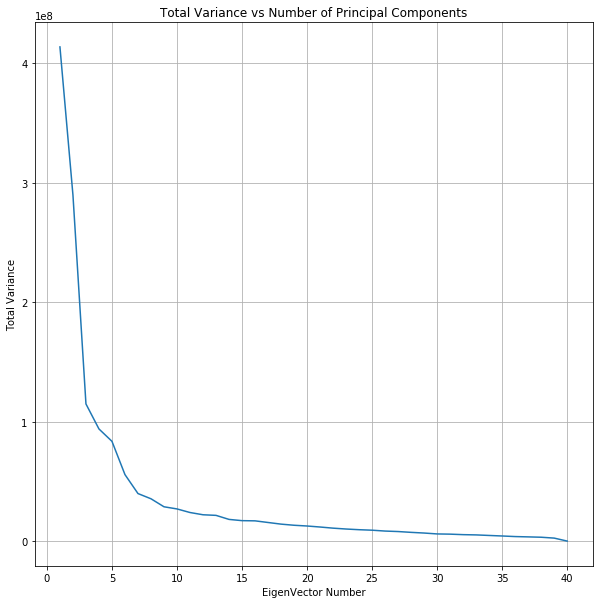

In [356]:

total_variance = []

for i in range(0,40):
    variance = evalsN[i]
    total_variance.append(np.sum(variance))

vectornumber = np.arange(1,41)
plt.figure(figsize=(10,10))
#plt.plot( vectornumber, total_variance)
plt.plot( vectornumber, evalsN)
plt.title('Total Variance vs Number of Principal Components')
plt.xlabel('EigenVector Number')
plt.ylabel('Total Variance')
plt.grid(True)
plt.show()

#### Also plot the total variance against the eigenvector number used for computation. (Refer Slide-57 of Lecture-17) (2 points).

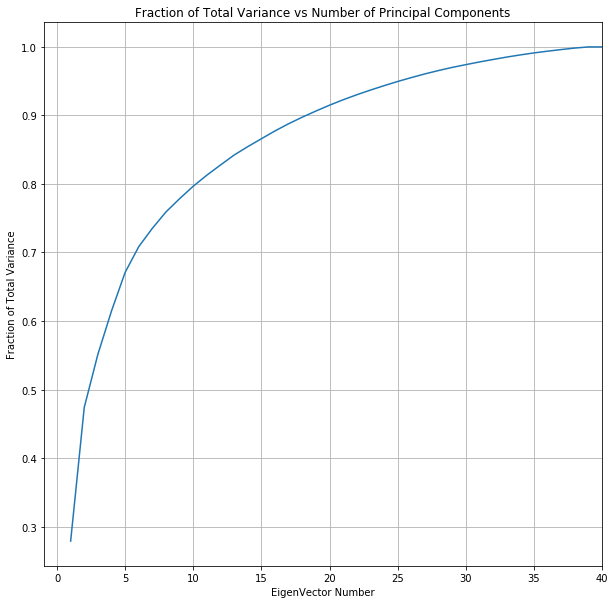

In [357]:
frac_total_variance = []
numeratorsum = 0
evaltotal = np.sum(evalsN)

for i in range(0,40): 
        
    numerator = evalsN[i]
    
    numeratorsum = evalsN[i] + numeratorsum
   
    fraction = numeratorsum/evaltotal
    
    frac_total_variance.append(fraction)

vectornumber = np.arange(1,41)
plt.figure(figsize=(10,10))
plt.plot( vectornumber, frac_total_variance)
plt.title('Fraction of Total Variance vs Number of Principal Components')
plt.xlabel('EigenVector Number')
plt.ylabel('Fraction of Total Variance')
plt.xlim(xmax=40)
plt.grid(True)
plt.show()

#### Do you need all the vectors to represent the data? Discuss (3 points). 

No, we can see that after roughly the 38th principal component the values are uncahnging. This means that principal components 39 and 40 are not necessary for us to perform calculations.

This means we can essentually keep only the first 38 principal compoenents as all variance in the data is accounted for with those components. 

If our pictures were more similar ie. had less variance between them, it would take fewer principal components to account for the variance.

##### Display the first 5 eigenfaces (5 points).

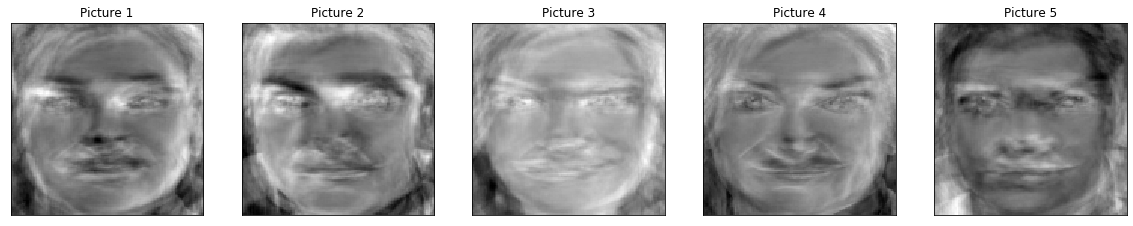

37

In [358]:
eigenfaces = []

# we already sort the eigenvalues and corresponding vectors in decreasing order

#eig_pairs = [(evals[index], evecs[:,index]) for index in range(len(evals))]

# we dispose of the data after 38 roughly since we know those principal components are not participating
reduced_data = np.array(evecsN[:38]).transpose()

#reshape the data to display it
face_data = np.dot(PCA_facesN,reduced_data)
face_data = face_data.transpose()

#want to show the eigenfaces
for i in range(1, face_data.shape[0]):
    img = face_data[i].reshape(128,128)
    eigenfaces.append(img)

plot(eigenfaces)
#we confirm that we have 20 eigenfaces as expected. 
len(eigenfaces)



##  3. Neighbourhood Clustering:
#### For every training image, find the nearest neighbour (L2 distance), and check whether both images belong to the same person. What fraction of your data has a neighbour that is of the same person?

#### Do this both in the original high dimensional pixel space and then in the eigenspace, and compare the accuracy values. Would you expect there to be a significant difference? (10 points).

In [359]:
#following the idea in the slides Face Recognition Lecture 17
# we want to find the argmin distance between a face and all its neighbours to try to identify

# we will find the nearest neighbour with the high dimensional pixel space
dataset = np_normalizedImgs.copy()

neighbours = []
for face in dataset:
        nearestNeighbour = []
        for i in range(40):
                #perform the argmin calculation
            nearestNeighbour.append(np.linalg.norm(face - dataset[i], ord=2))
            #print((nearestNeighbour))
            #print(nearestNeighbour[i])
            if (nearestNeighbour[i] == 0):
                #print("entering loop")
                nearestNeighbour[i] = 50000
                  
            
        #min_index = np.argsort(np.abs(nearestNeighbour))[1]
        
        min_index = np.argmin(nearestNeighbour)
        neighbours.append(min_index)
        print("min index",min_index)
        print ("face", face)
        print("nearest neighbour", min_index)
        
print(neighbours)

min index 13
face [ -5.275  -6.25   -4.925 ... -12.525  -4.3     6.575]
nearest neighbour 13
min index 5
face [118.725 119.75  123.075 ... -53.525 -26.3   -25.425]
nearest neighbour 5
min index 21
face [-19.275 -10.25    5.075 ... -83.525 -84.3   -82.425]
nearest neighbour 21
min index 4
face [102.725 103.75   94.075 ...  87.475  56.7    57.575]
nearest neighbour 4
min index 5
face [111.725 117.75  125.075 ... -22.525 -15.3    -4.425]
nearest neighbour 5
min index 4
face [121.725 119.75  121.075 ... -55.525 -54.3   -48.425]
nearest neighbour 4
min index 8
face [-47.275 -43.25  -37.925 ... -66.525 -63.3   -53.425]
nearest neighbour 8
min index 9
face [45.725 36.75  25.075 ... 78.475 73.7   66.575]
nearest neighbour 9
min index 6
face [-35.275 -39.25  -36.925 ... -78.525 -77.3   -79.425]
nearest neighbour 6
min index 5
face [-35.275 -42.25  -32.925 ... -20.525 -18.3   -10.425]
nearest neighbour 5
min index 17
face [-47.275 -49.25  -49.925 ... 137.475  86.7    44.575]
nearest neighbour 17

In [360]:
print(neighbours)
print(len(neighbours))

newneighbours = np.reshape(neighbours, (4, 10)) 
print(newneighbours)

numberCorrectMatches128 = []
#now we want to find out if the classification was correct

# the first 10 values should be between 0-9
for value in neighbours[0:10]:
   # print("value", value)
    if (value in range(0,10)):
        numberCorrectMatches128.append(value)
        #print(numberCorrectMatches128)
        
#print("9 to 20 for loop")
#the next 10 values should be between 10-19
for value in neighbours[10:20]:
    #print("value", value)
    if (value in range(10,20)):
        numberCorrectMatches128.append(value)
        #print(numberCorrectMatches128)

#print("20 to 31 for loop")
#the next 10 values shouls be between 20 - 29
for value in neighbours[20:30]:
    #print("value", value)
    if (value in range(20,30)):
        numberCorrectMatches128.append(value)
        #print(numberCorrectMatches128)   

#print("20 to 31 for loop")
# the final 10 values should be between 30 - 39
for value in neighbours[30:40]:
    #print("value", value)
    if (value in range(30,40)):
        numberCorrectMatches128.append(value)
        #print(numberCorrectMatches128)   

print("The total number matches in 128 space is:", len(numberCorrectMatches128))
print("In percentage:", len(numberCorrectMatches128)/40 *100)

[13, 5, 21, 4, 5, 4, 8, 9, 6, 5, 17, 15, 15, 28, 13, 12, 15, 10, 19, 18, 29, 29, 23, 14, 25, 12, 27, 29, 13, 20, 36, 32, 31, 38, 38, 30, 39, 8, 33, 36]
40
[[13  5 21  4  5  4  8  9  6  5]
 [17 15 15 28 13 12 15 10 19 18]
 [29 29 23 14 25 12 27 29 13 20]
 [36 32 31 38 38 30 39  8 33 36]]
The total number matches in 128 space is: 33
In percentage: 82.5


In [361]:
#we will now do this in the eigenspace
#each face is represented by a vector 

dataset = evecsN.copy()
print(len(dataset))
print(dataset.shape)

evecneighbours = []

for face in dataset:
        nearestNeighbour = []
        for i in range(40):
                #perform the argmin calculation
                nearestNeighbour.append(np.linalg.norm(face - dataset[i], ord=2))
                print(nearestNeighbour)
                if (nearestNeighbour[i] == 0):
                    print("entering loop")
                    nearestNeighbour[i] = 50000
                    print(nearestNeighbour)
                
        min_index = np.argmin(nearestNeighbour)
        evecneighbours.append(min_index)
        print ("face", face)
        print("nearest neighbour", min_index)

print(evecneighbours) 


40
(40, 40)
[0.0]
entering loop
[50000]
[50000, 1.4142135623730956]
[50000, 1.4142135623730956, 1.414213562373095]
[50000, 1.4142135623730956, 1.414213562373095, 1.4142135623730951]
[50000, 1.4142135623730956, 1.414213562373095, 1.4142135623730951, 1.414213562373095]
[50000, 1.4142135623730956, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730954]
[50000, 1.4142135623730956, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730954, 1.414213562373095]
[50000, 1.4142135623730956, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730954, 1.414213562373095, 1.4142135623730951]
[50000, 1.4142135623730956, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730954, 1.414213562373095, 1.4142135623730951, 1.414213562373095]
[50000, 1.4142135623730956, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730954, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951]
[50000, 

[1.4142135623730956, 50000, 1.4142135623730954, 1.414213562373095, 1.4142135623730954, 1.4142135623730951, 1.4142135623730951, 1.414213562373095, 1.414213562373095, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.414213562373095, 1.414213562373095, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951]
[1.4142135623730956, 50000, 1.4142135623730954, 1.414213562373095, 1.4142135623730954, 1.4142135623730951, 1.4142135623730951, 1.414213562373095, 1.414213562373095, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.414213562373095, 1.414213562373095, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.414213562373095]
[1.4142135623730956, 50000, 1.4142135623730954, 1.414213562373095, 1.4142135623730954, 1.4142135623730951, 1.4142135623730951, 1.414213562373095, 1.414213562373095, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.414213562373095, 1.414213562373095, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951, 1.4142135623

[1.414213562373095, 1.4142135623730951, 1.4142135623730951, 1.414213562373095]
[1.414213562373095, 1.4142135623730951, 1.4142135623730951, 1.414213562373095, 1.4142135623730954]
[1.414213562373095, 1.4142135623730951, 1.4142135623730951, 1.414213562373095, 1.4142135623730954, 1.4142135623730954]
[1.414213562373095, 1.4142135623730951, 1.4142135623730951, 1.414213562373095, 1.4142135623730954, 1.4142135623730954, 1.4142135623730951]
[1.414213562373095, 1.4142135623730951, 1.4142135623730951, 1.414213562373095, 1.4142135623730954, 1.4142135623730954, 1.4142135623730951, 1.414213562373095]
[1.414213562373095, 1.4142135623730951, 1.4142135623730951, 1.414213562373095, 1.4142135623730954, 1.4142135623730954, 1.4142135623730951, 1.414213562373095, 1.4142135623730951]
[1.414213562373095, 1.4142135623730951, 1.4142135623730951, 1.414213562373095, 1.4142135623730954, 1.4142135623730954, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.4142135623730954]
[1.414213562373095, 1.41421356

[1.4142135623730954, 1.4142135623730951, 1.4142135623730954, 1.4142135623730956, 1.4142135623730951, 1.4142135623730954, 1.4142135623730951, 1.4142135623730951, 1.414213562373095, 1.4142135623730954, 1.4142135623730945, 1.4142135623730958, 1.4142135623730965, 1.4142135623730951, 1.414213562373097, 1.4142135623730956, 1.4142135623730951, 1.4142135623730905, 1.4142135623731062, 0.0]
entering loop
[1.4142135623730954, 1.4142135623730951, 1.4142135623730954, 1.4142135623730956, 1.4142135623730951, 1.4142135623730954, 1.4142135623730951, 1.4142135623730951, 1.414213562373095, 1.4142135623730954, 1.4142135623730945, 1.4142135623730958, 1.4142135623730965, 1.4142135623730951, 1.414213562373097, 1.4142135623730956, 1.4142135623730951, 1.4142135623730905, 1.4142135623731062, 50000]
[1.4142135623730954, 1.4142135623730951, 1.4142135623730954, 1.4142135623730956, 1.4142135623730951, 1.4142135623730954, 1.4142135623730951, 1.4142135623730951, 1.414213562373095, 1.4142135623730954, 1.41421356237309

[1.4142135623730951, 1.4142135623730951, 1.4142135623730954, 1.4142135623730951, 1.4142135623730951, 1.4142135623730954, 1.4142135623730951, 1.4142135623730956, 1.4142135623730951, 1.4142135623730954, 1.4142135623730954, 1.4142135623730951, 1.4142135623730951, 1.4142135623730956, 1.4142135623730947, 1.414213562373095, 1.4142135623730956, 1.414213562373096, 1.414213562373095, 1.414213562373093, 1.4142135623730971]
[1.4142135623730951, 1.4142135623730951, 1.4142135623730954, 1.4142135623730951, 1.4142135623730951, 1.4142135623730954, 1.4142135623730951, 1.4142135623730956, 1.4142135623730951, 1.4142135623730954, 1.4142135623730954, 1.4142135623730951, 1.4142135623730951, 1.4142135623730956, 1.4142135623730947, 1.414213562373095, 1.4142135623730956, 1.414213562373096, 1.414213562373095, 1.414213562373093, 1.4142135623730971, 0.0]
entering loop
[1.4142135623730951, 1.4142135623730951, 1.4142135623730954, 1.4142135623730951, 1.4142135623730951, 1.4142135623730954, 1.4142135623730951, 1.4142

In [362]:
print(evecneighbours)
print(len(evecneighbours))

newevecneighbours = np.reshape(evecneighbours, (4, 10)) 
print(newevecneighbours)

numberCorrectMatchesevec = []
#now we want to find out if the classification was correct

#THIS IS FOR JONNY 
# the first 10 values should be between 0-9
for value in evecneighbours[0:10]:
   # print("value", value)
    if (value in range(0,10)):
        numberCorrectMatchesevec.append(value)
        #print(numberCorrectMatches128)

#THIS IS FOR DAVID
#print("9 to 20 for loop")
#the next 10 values should be between 10-19
for value in evecneighbours[10:20]:
    #print("value", value)
    if (value in range(10,20)):
        numberCorrectMatchesevec.append(value)
        #print(numberCorrectMatches128)
#THIS IS FOR MOIRA
#print("20 to 31 for loop")
#the next 10 values shouls be between 20 - 29
for value in evecneighbours[20:30]:
    #print("value", value)
    if (value in range(20,30)):
        numberCorrectMatchesevec.append(value)
        #print(numberCorrectMatches128)   
#THIS IS FOR ALEXIS
#print("20 to 31 for loop")
# the final 10 values should be between 30 - 39
for value in evecneighbours[30:40]:
    #print("value", value)
    if (value in range(30,40)):
        numberCorrectMatchesevec.append(value)
        #print(numberCorrectMatches128)   

print("The total number matches in evec space is:", len(numberCorrectMatchesevec))
print("In percentage:", len(numberCorrectMatchesevec)/40 *100)

[2, 3, 12, 9, 6, 13, 12, 1, 10, 11, 8, 9, 6, 16, 17, 13, 13, 19, 20, 17, 18, 19, 23, 22, 21, 26, 25, 28, 27, 30, 29, 30, 31, 34, 33, 36, 35, 33, 36, 36]
40
[[ 2  3 12  9  6 13 12  1 10 11]
 [ 8  9  6 16 17 13 13 19 20 17]
 [18 19 23 22 21 26 25 28 27 30]
 [29 30 31 34 33 36 35 33 36 36]]
The total number matches in evec space is: 27
In percentage: 67.5


In the The 128x128 faces are found to 85% accuracy. This means that 85% or 33 of the 40 photos have a neighbour match that is of the first person.

In the eigenspace, the matches are found to 67.5% accuracy. This means that 27 of the 40 photos are able to successfully find a nearest neighbour of the correct person. 

This is to be not too surprising as more data (pixels) are compared in teh 128 space than in the eigenspace. When more data is present it becomes more accurate when making a comparison between photos. There is not a crazy significant difference between the two methods, but what we observe is unsurprising.

##  4. Face Detection & Recognition
#### You will now detect all the faces in the group image. Use a sliding window to detect the faces. Set a threshold on the distance in eigenspace between the window contents and your training data. Try different values of thresholds and use the one which gives you good results. Display your image with bounding boxes around detected faces for your best threshold. (ex. Figure 1) 2 (15 points).

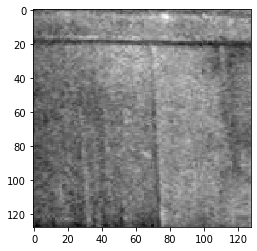

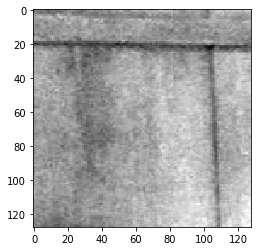

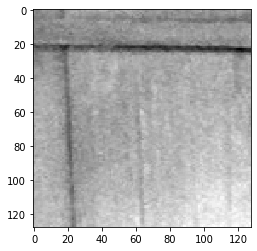

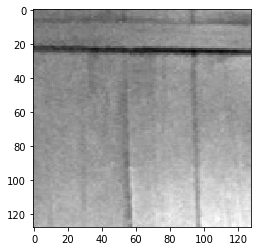

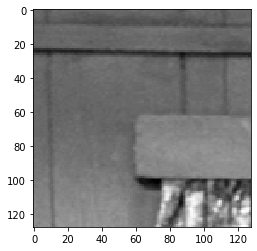

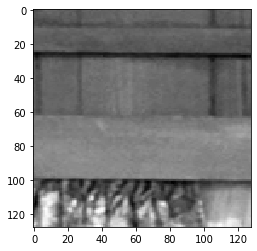

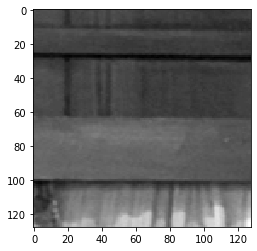

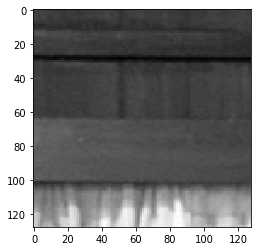

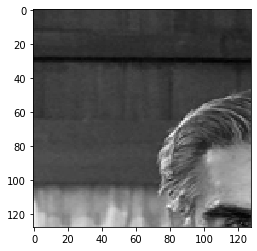

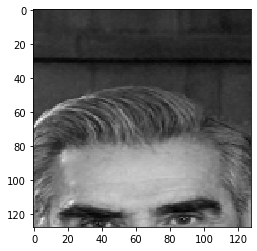

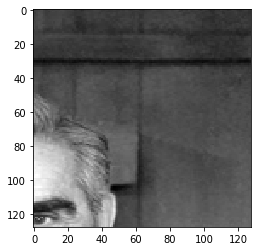

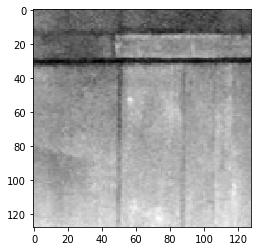

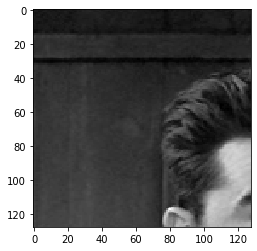

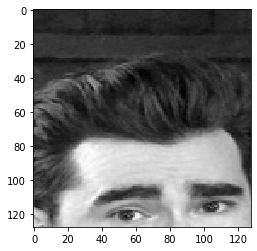

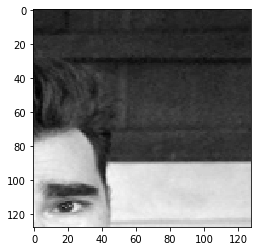

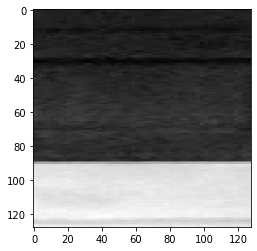

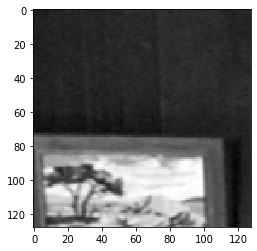

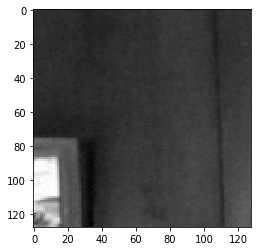

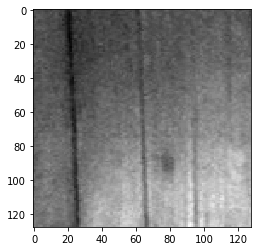

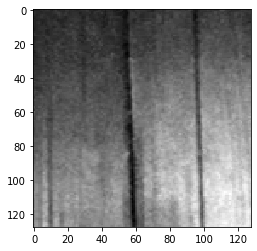

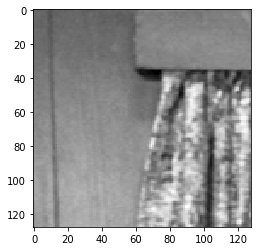

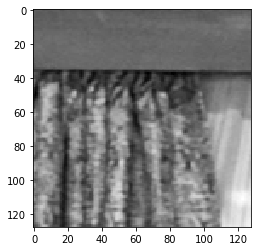

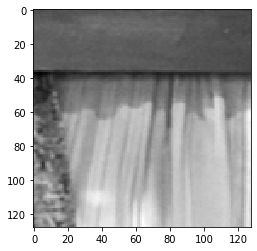

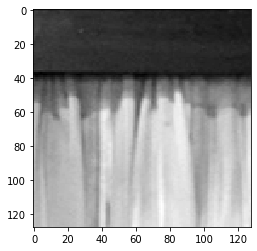

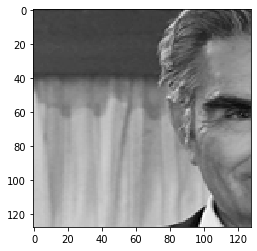

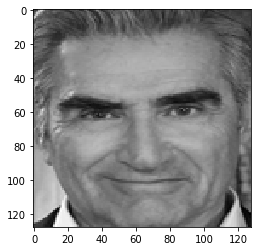

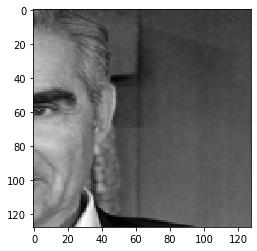

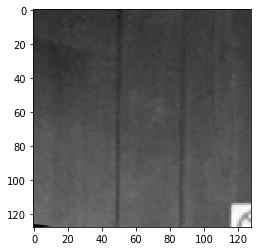

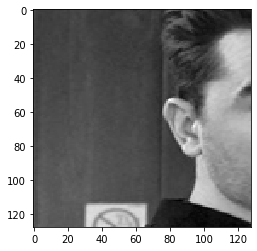

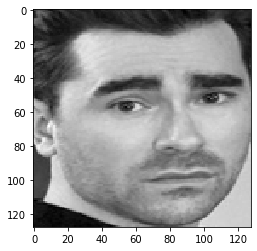

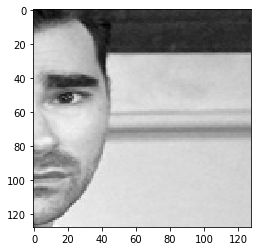

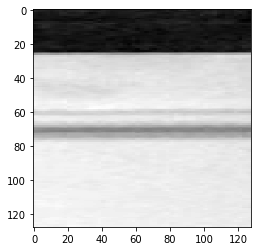

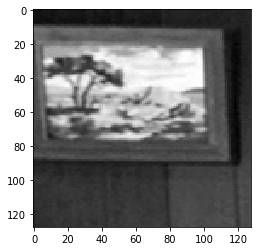

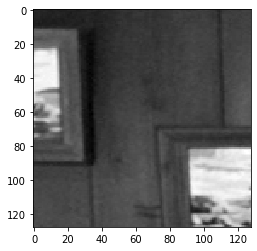

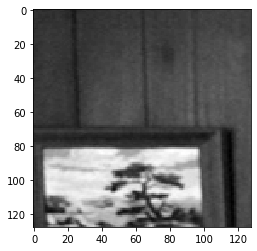

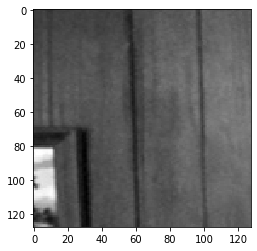

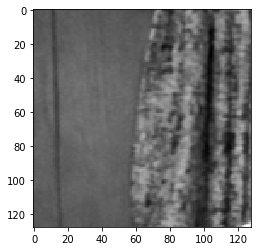

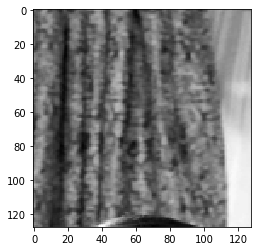

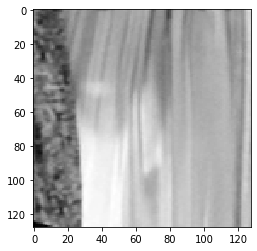

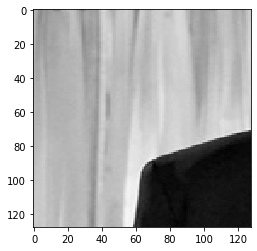

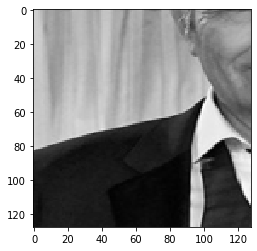

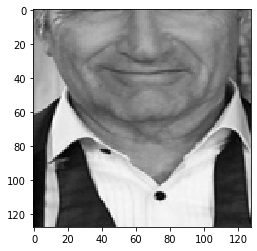

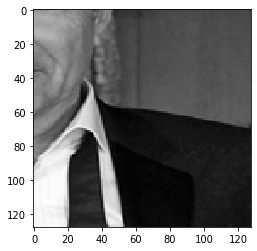

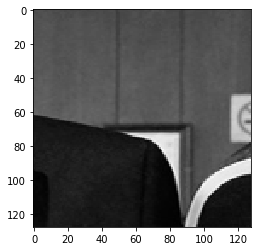

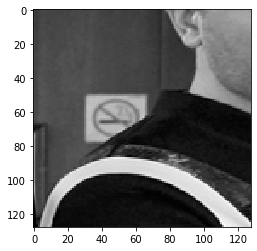

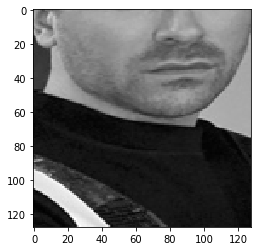

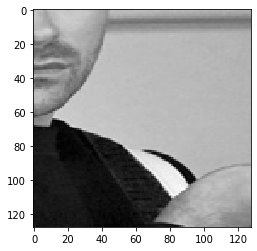

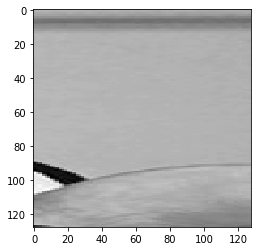

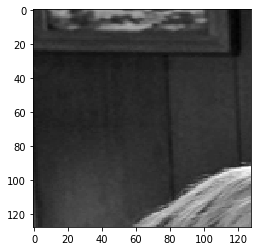

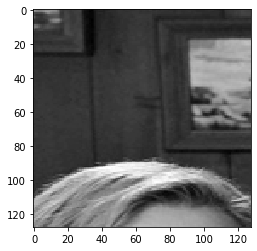

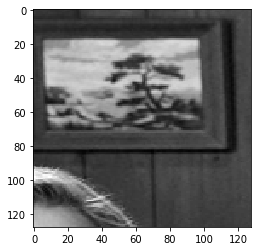

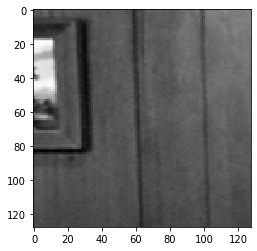

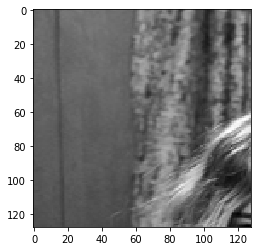

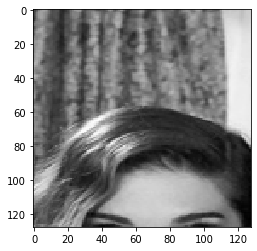

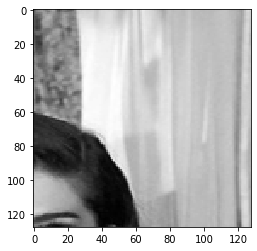

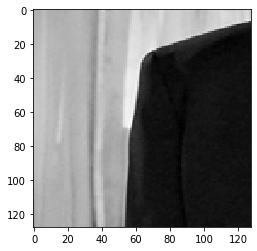

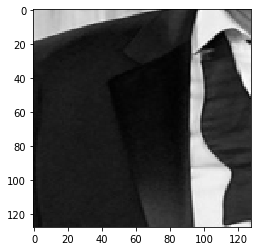

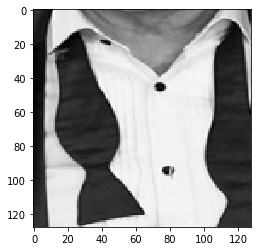

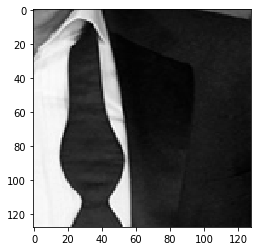

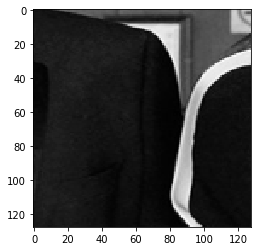

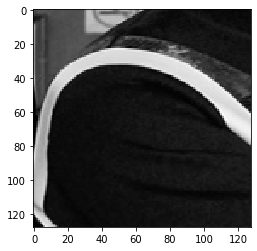

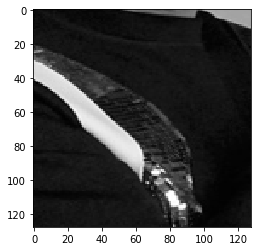

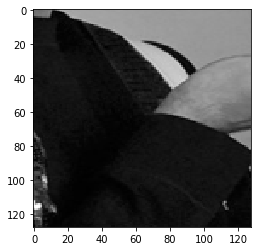

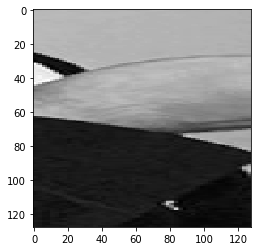

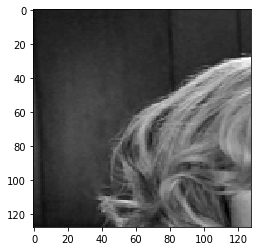

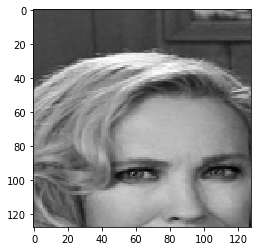

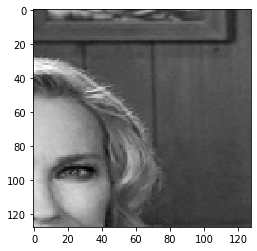

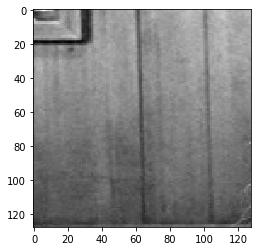

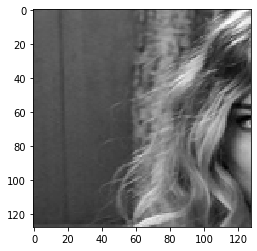

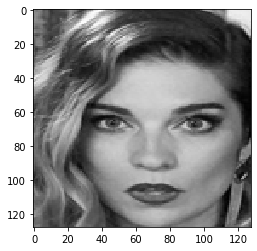

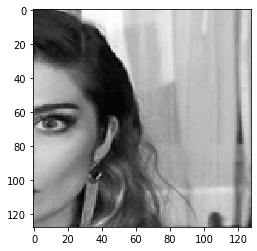

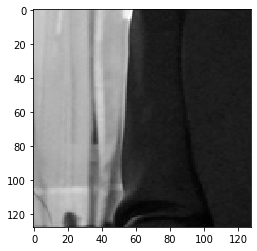

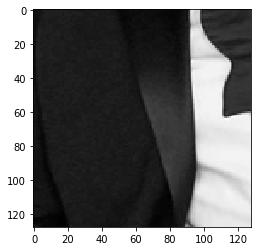

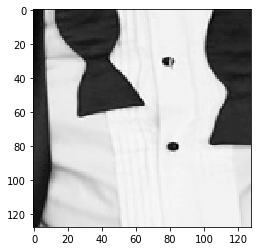

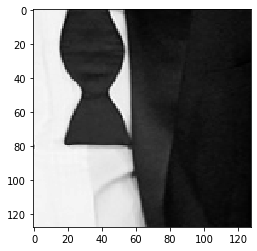

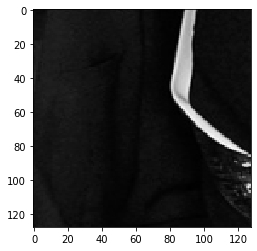

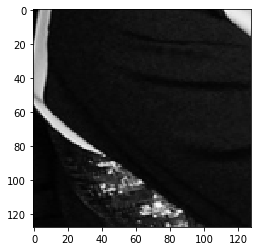

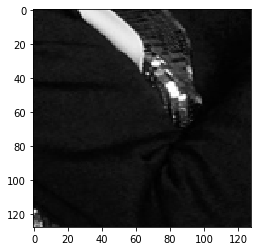

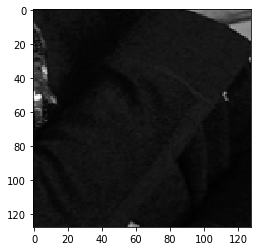

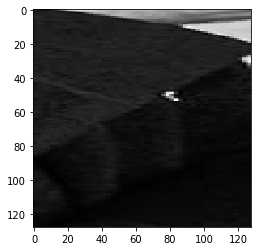

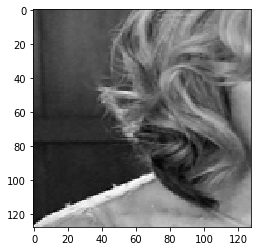

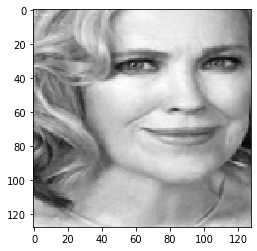

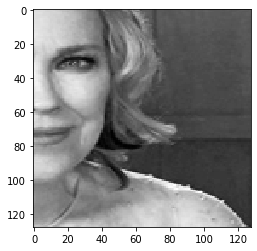

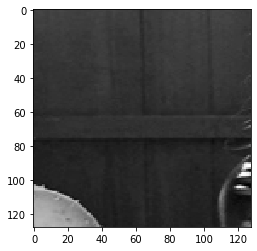

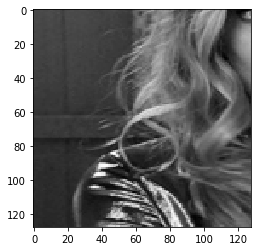

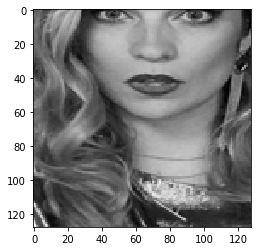

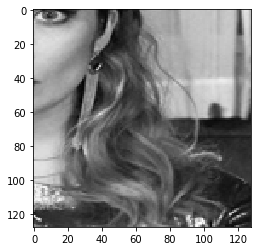

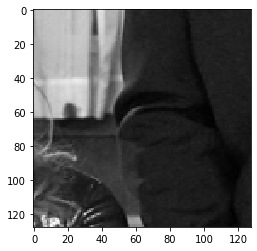

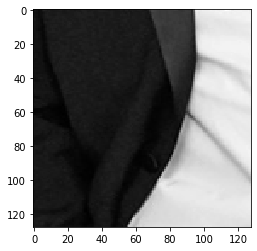

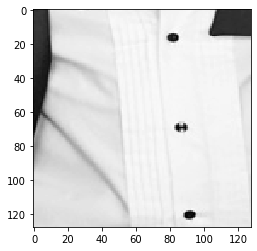

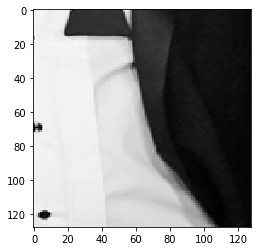

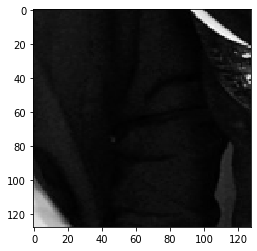

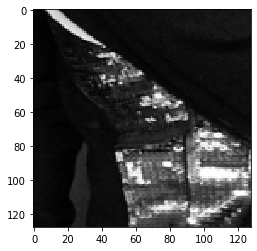

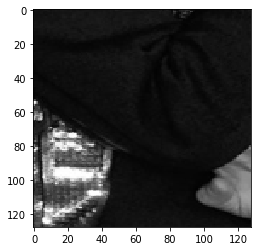

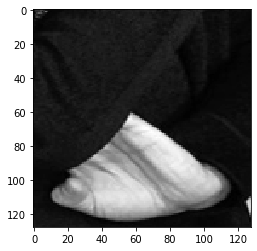

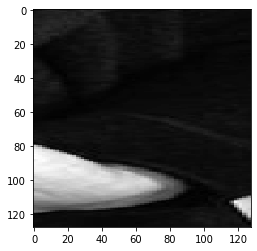

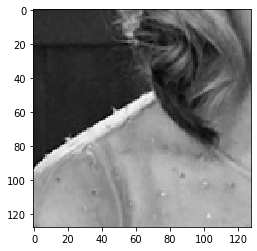

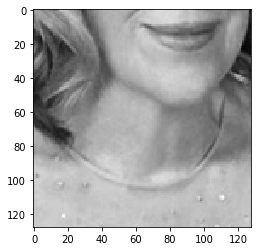

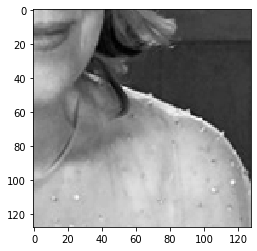

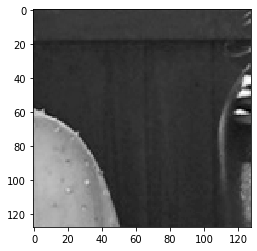

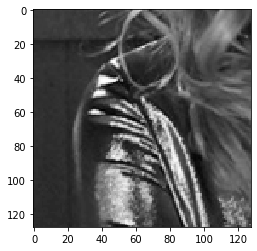

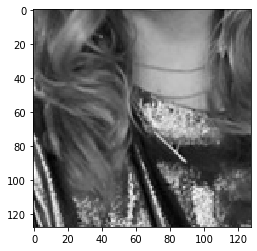

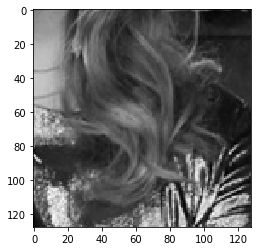

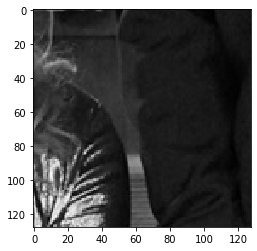

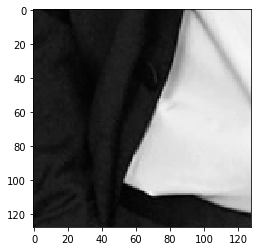

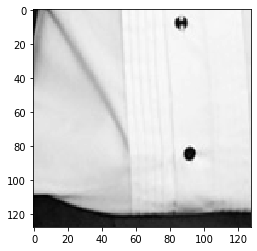

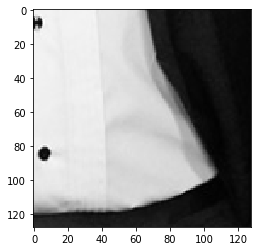

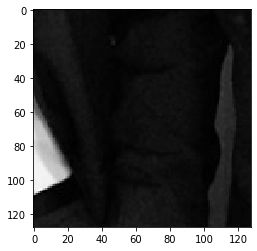

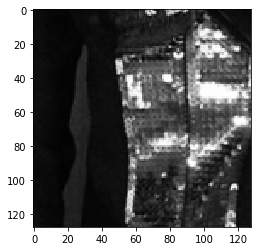

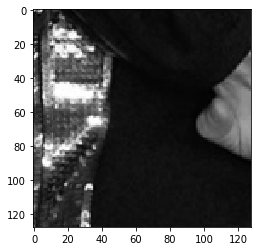

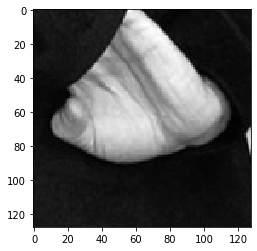

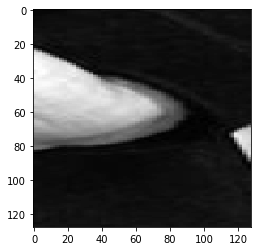

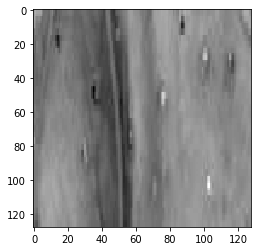

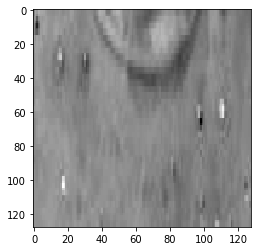

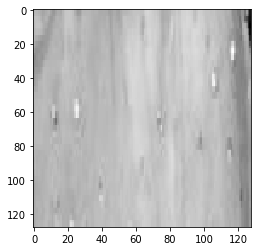

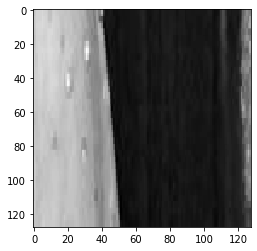

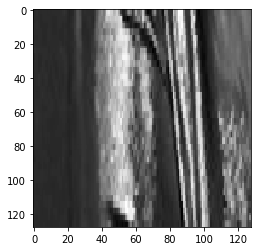

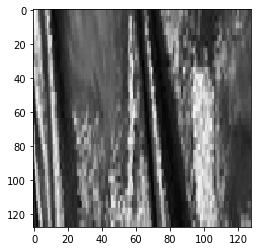

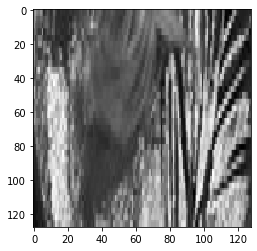

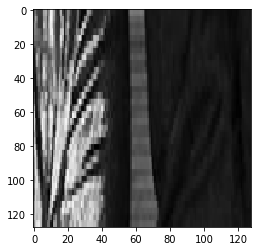

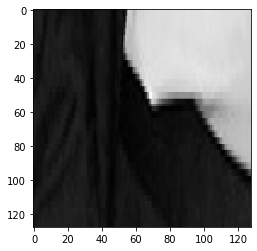

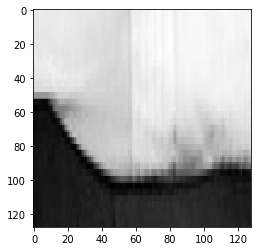

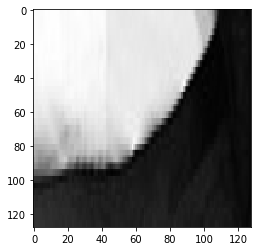

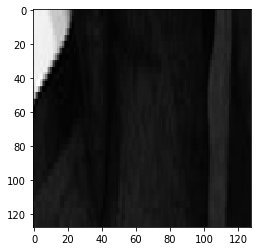

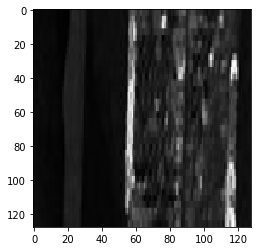

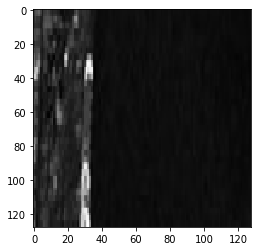

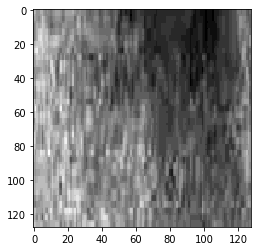

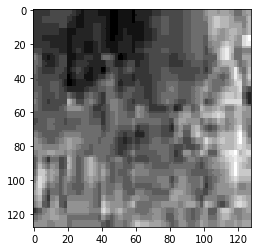

128
128


In [363]:
#SLIDING WINDOW from assignment 2

# find overlapping windows, each window is a region of the test image
# step size is how many pixels we will examine at one time
# windowsize is the height and width of an image

temp = res1.copy()

def slidingWindow(image, stepSize, windowSize):
    # create parameters for a windor to slide across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # result is the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])
            
# The step size used will be 100 pixels and and window size 150x200 pixels
overlappingWindows = slidingWindow(res1, 100, [150,200])  #(res1, 100, [300,400])

Resize_test =[]
n=0
for i in overlappingWindows:
    n +=1
    pic = cv2.resize(i[2], (128, 128),interpolation=cv2.INTER_AREA)
    
    Resize_test.append(pic)
    plt.figure()
    plt.imshow(pic, cmap='gray')
    plt.show()


print(n)
print(len(Resize_test))

#the picstures take a little bit of time to load, please be patient

In [364]:
# we want to DETECT faces
np_Resize_test = np.array(Resize_test)
print(np_Resize_test.shape)

#we only want 2 dimensions to deal with.
#np_Resize_test = np_Resize_test.reshape(np_Resize_test.shape[0], -1)
#print(np_Resize_test.shape)
    
# we will find the nearest neighbour with the high dimensional pixel space
dataset = np_Resize_test.copy()

lowerthreshold = 3000
threshold = 4300

differences = []
foundfaces = []

for face in dataset:
        #perform the argmin calculation
        differences.append(np.linalg.norm(face - meanface, ord=2))

# we will set a threshold between eigenspace and the test photos
for i in differences:
        if (lowerthreshold< i < threshold):
            foundfaces.append(i)

        else: 
            foundfaces.append(0)
                
print("found faces",foundfaces)


(128, 128, 128)
found faces [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3228.597820360501, 0, 0, 0, 3767.6771609456796, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3922.1759068702154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4056.231053480265, 0, 0, 0, 4105.544158973694, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[25, 29, 65, 81, 85]
128
[[ 68  62  74 ...  59  55  52]
 [ 72  76 138 ...  60  59  58]
 [ 87 127 199 ...  71  66  62]
 ...
 [121  97  75 ...  28  15  21]
 [ 53  51  61 ...  51  18  24]
 [ 61  61  60 ...  72  17  19]]


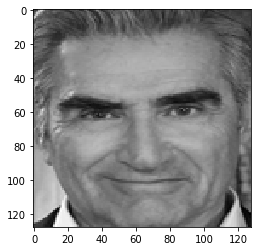

[[ 62  61  70 ...  33  35  36]
 [ 27  45  77 ...  36  37  37]
 [ 32  51  81 ...  40  37  34]
 ...
 [ 21  19  19 ... 162 161 161]
 [ 17  16  20 ... 161 161 161]
 [ 14  18  18 ... 162 161 160]]


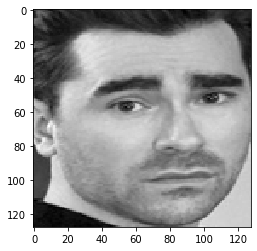

[[ 81  80  78 ... 124  95  87]
 [ 83  84  81 ... 113  94  89]
 [ 83  84  84 ...  99  98  90]
 ...
 [118 120 110 ... 105  96  42]
 [123 121 119 ... 113  98  33]
 [135 133 128 ... 116 101  33]]


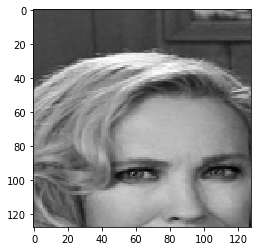

[[149 159 153 ...  70  94  90]
 [157 153 130 ...  64  77  89]
 [165 153 143 ...  64  68  80]
 ...
 [177 177 172 ... 157 151 150]
 [179 180 175 ... 155 154 157]
 [181 181 179 ... 156 158 159]]


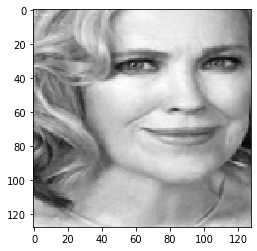

[[ 93  80  95 ...  13  15  17]
 [ 95  84  95 ...  14  13  15]
 [ 94 106 100 ...  17  15  15]
 ...
 [227 152  88 ...  47  49  40]
 [240 199 109 ...  54  58  62]
 [246 234 157 ...  73  70  68]]


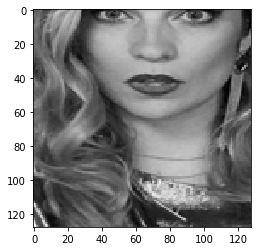

In [365]:
#let us print the detected faces
detectedfacesindeces = []
counter =0 
    
for i in range(len(foundfaces)):
    if foundfaces[i] != 0:  
        detectedfacesindeces.append(i)
print (detectedfacesindeces)   

detectedfaces = []

#find the faces detected in the windows
print(len(Resize_test))
for i in detectedfacesindeces:
    detectedfaces.append(Resize_test[i])

for i in detectedfaces:
    print(i)
    plt.figure()
    plt.imshow(i, cmap='gray')
    plt.show()

        


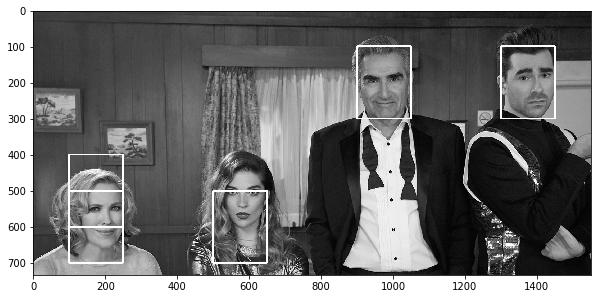

In [366]:
#https://medium.com/@muskulpesent/sliding-windows-for-object-detection-with-python-709250eb6161

# read the image and define the stepSize and window size 
# (width,height)
image = res1.copy() # your image path
tmp = image # for drawing a rectangle
stepSize = 100
(w_width, w_height) = (150, 200) # window size
windows = []
i=0
for y in range(0, image.shape[0] , stepSize):
    for x in range(0, image.shape[1], stepSize):
        window = image[x:x + w_width, y:y + w_height]
        windows.append(window)
        #since we already know the indices of the boxes we need
        if (len(windows) == 26): 
            cv2.rectangle(tmp, (x, y), (x + w_width, y + w_height), (255, 0, 0), 4) # draw rectangle on image
        if (len(windows) == 30): 
            cv2.rectangle(tmp, (x, y), (x + w_width, y + w_height), (255, 0, 0), 4) # draw rectangle on image
        if (len(windows) == 66): 
            cv2.rectangle(tmp, (x, y), (x + w_width, y + w_height), (255, 0, 0), 4) # draw rectangle on image
        if (len(windows) == 82): 
            cv2.rectangle(tmp, (x, y), (x + w_width, y + w_height), (255, 0, 0), 4) # draw rectangle on image
        if (len(windows) == 86): 
            cv2.rectangle(tmp, (x, y), (x + w_width, y + w_height), (255, 0, 0), 4) # draw rectangle on image

#(i == 25 or 29 or 65 or 81 or 85):
        
plt.figure(figsize=(10,10))
plt.imshow(np.array(tmp).astype('uint8'), cmap = 'gray')
# show all windows
plt.show()


#here is the displated image with bounding boxes

#### You will now try to recognize each of the people in the group image. For the windows in which a face is correctly detected, project the contents of the window to your eigenspace and find the nearest neighbour from your data. The identity of the detected face will be based on the identity of the closest person in the training set. How well does the method work? How many false positive face detections do you get? For mis-identified faces, report the number of neighbours you need before getting the correct label (correct identification would use 1). In which situations would expect the approach to fail, and what could you do to improve it? (15 points).

In [367]:
normalizedfaces = []

#first we want to normalize all the images in training images
for img in detectedfaces:
    normalface = img - meanface
    normalizedfaces.append(normalface)

np_detectedfaces = np.array(normalizedfaces)
print(np_detectedfaces.shape)

#we only want 2 dimensions to deal with.
np_detectedfaces = np_detectedfaces.reshape(np_detectedfaces.shape[0], -1)
print("np_detectedfaces",np_detectedfaces.shape)
print("PCA_facesN", PCA_facesN.shape)
#now we want to map this to our eigenspace

 
New_pca = np.dot(np_detectedfaces, PCA_facesN)
print(New_pca.shape)

#now find nearest Neighbour in the eigenspace
#each face is represented by a vector 

dataset = New_pca.copy()
print(len(dataset))
print(dataset.shape)


evecneighbours = []

for face in dataset:
        nearestNeighbour = []
        for i in range(40):
                #perform the argmin calculation
                nearestNeighbour.append(np.linalg.norm(face - EVECS[i], ord=2))

        min_index = np.argmin(nearestNeighbour)
        evecneighbours.append(min_index)
        #print("nearest neighbour", min_index)

print(evecneighbours) 




(5, 128, 128)
np_detectedfaces (5, 16384)
PCA_facesN (16384, 40)
(5, 40)
5
(5, 40)
[19, 19, 34, 20, 11]


In [368]:
print(evecneighbours)

numberCorrectMatchesevec = []
#now we want to find out if the classification was correct

#THIS IS FOR JONNY 
# the first 10 values should be between 0-9
if( evecneighbours[0] in range(0,10)): 
    numberCorrectMatchesevec.append(value)
    print("found Johnny")

#THIS IS FOR DAVID
#print("9 to 20 for loop")
#the next 10 values should be between 10-19
if (evecneighbours[1] in range(10,20)):
    numberCorrectMatchesevec.append(value)
    print("found David")
    
#THIS IS FOR MOIRA
#print("20 to 31 for loop")
#the next 10 values shouls be between 20 - 29

    #print("value", value)
if (evecneighbours[2] in range(19,30)):
    numberCorrectMatchesevec.append(value)
    print("found Moira")  
        
if (evecneighbours[3] in range(19,30)):
    numberCorrectMatchesevec.append(value)
    print("found Moira")  
        
#THIS IS FOR ALEXIS
#print("20 to 31 for loop")
# the final 10 values should be between 30 - 39
    if (evecneighbours[4] in range(30,40)):
        numberCorrectMatchesevec.append(value)
        print("Found Alexis")   

print("The total number matches in evec space is:", len(numberCorrectMatchesevec))
print("In percentage:", len(numberCorrectMatchesevec)/5 *100)

[19, 19, 34, 20, 11]
found David
found Moira
The total number matches in evec space is: 2
In percentage: 40.0


The method doesn't work amazingly well we only matched 2 of the 5 people in our photo. We have 3 other false positives. However one of the bounding boxes doesn't really capture a full face so we will discount that and claim we foudn 2 of 4 people to 50% accuracy.


In [369]:
#For misidentified faces we will try again
#match 19 and 34 were correctly identified so we will work on the other 2

#the number of neighbours you need before getting the correct label

normalizedfaces = []


#first we want to normalize all the images in training images
for img in detectedfaces:
    normalface = img - meanface
    normalizedfaces.append(normalface)

np_detectedfaces = np.array(normalizedfaces)
print(np_detectedfaces.shape)

#we only want 2 dimensions to deal with.
np_detectedfaces = np_detectedfaces.reshape(np_detectedfaces.shape[0], -1)
#print("np_detectedfaces",np_detectedfaces.shape)
#print("PCA_facesN", PCA_facesN.shape)

#now we want to map this to our eigenspace
New_pca = np.dot(np_detectedfaces, PCA_facesN)
#print(New_pca.shape)

#now find nearest Neighbour in the eigenspace
#each face is represented by a vector 

dataset = New_pca.copy()
#print(len(dataset))
#print(dataset.shape)
EVECS = evecsN.copy()


evecneighbours = []

for face in dataset:
        nearestNeighbour = []
        for i in range(40):
                #perform the argmin calculation
                nearestNeighbour.append(np.linalg.norm(face - EVECS[i], ord=2))
        print("nearest min distances for detected face")
        idx = np.argpartition(nearestNeighbour, 1)
        print(idx)
        min_index = np.argmin(nearestNeighbour)
        
        evecneighbours.append(min_index)
        #print("nearest neighbour", min_index)

print(evecneighbours) 



(5, 128, 128)
nearest min distances for detected face
[19  9  2  3  4  5  6  7  8  1 10 11 12 13 14 15 16 17 18  0 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
nearest min distances for detected face
[19  9  2  3  4  5  6  7  8  1 10 11 12 13 14 15 16 17 18  0 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
nearest min distances for detected face
[34 15  2  3  4  5  6  7  8  9 10 11 12 13 14  1 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33  0 35 36 37 38 39]
nearest min distances for detected face
[20 17  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16  1 18 19  0 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
nearest min distances for detected face
[11 17  2  3  4  5  6  7  8  9 10  0 12 13 14 15 16  1 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[19, 19, 34, 20, 11]


For face 1: we see the second arg min is at value 9, so it would take **2** attempts to find Jhonny's face

For face 2: we correctly match on the first attempt, **1** attempt

For face 3: we dont match on the first attempt. We need a value between 20-30, 2nd try fails, 3rd-15th tries fail, **takes 19 attempts HOWEVER face 3 isn't even a complete bounding box of a face so it should be discounted**

For face 4: we match correctly on the first attempt **1** attempt

For face 5:we fail on first, second attempt, fail on attetmps 2-29, **takes 29 attempts HOWEVER the bounding box of face 5 is also lacking the upper portion of the face and would explain the discrepancy** 